# Self-Study: Gradient Descent

In this notebook you will learn how to implement a naive gradient descent algorithm for a machine learning model with a single trainable parameter. In reality, models will have many more parameters. But since we are using a single parameter, we can visualize the gradient descent behaviour. This will be very helpful for understanding the algorithm.

To achive this, we will fit a line to a small dataset with one input and one output variable. This means finding the slope and the intercept of the line, given a dataset (X, y):

$ y = slope * x + intercept $

But this model still has two parameters, slope (or weight) and the y_intercept (or bias). To simplify it, we will keep the intercept at zero so that we only have one parameter to find:

$ y = weight * x + 0 $

**Learning objectives:**

At the end of this notebook, you will be able to:

- Implement a naive gradient descent algorithm for a machine learning model with a single trainable parameter without relying on machine learning libraries.
 
**Notebook contents:**

1. The Dataset
2. Gradient Descent

**Packages:**

Let's start by importing the basic packages required for this notebook:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 1. The Dataset

We are going to use the following dataset for exploring gradient descent:

In [2]:
X = np.array([5.57437646, 8.29649879, 2.76550707, 3.31084857, 2.15568324,
              6.78187318, 2.71542898, 3.56426356, 6.57516335, 7.09686466,
              7.8494032 , 9.8871235 , 4.87568879, 6.63442367, 4.87402536,
              7.7129583 , 6.94567421, 2.34017854, 6.03420865, 6.83534415])

y = np.array([13.17988756, 23.35179248,  8.48645234,  8.64750281,  5.07626627,
              17.92304241,  6.7051585 ,  8.97522423, 15.94414851, 19.28671018,
              19.46941448, 24.7421289 , 12.50352989, 18.07593665, 14.98462463,
              20.41706221, 20.2718029 ,  4.15552149, 16.87010359, 18.04898062])

Let's plot these datapoints together with lines $y = weight*x$ with different slopes. For this, we can create a function to plots the dataset as a scatter plot:

In [18]:
def line_plotter(X, y, weights):
    '''
    This function plots the dataset as a scatter plot
    
    and
    
    it plots the lines y = weight*x
    
    Arguments
     weights: a list of weights
    
    '''
    plt.scatter(X, y)
    plt.ylabel('y')
    plt.xlabel('x')
    for i, weight in enumerate(weights):
        line_text= f'Weight: {np.round(weight, 2)}, index={i}'
        plt.plot([0, 10], [0, 10*weight], label=line_text)
    plt.legend()

Now we can use the function to plot three lines with different slopes together with the dataset:

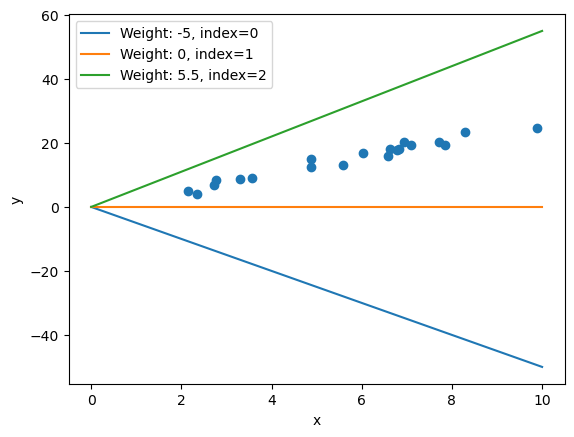

In [19]:
line_plotter(X, y, weights=[-5, 0, 5.5])

**Exercise 1:** use the line plotter to adjust the weight and find the best fitting line (a single line).

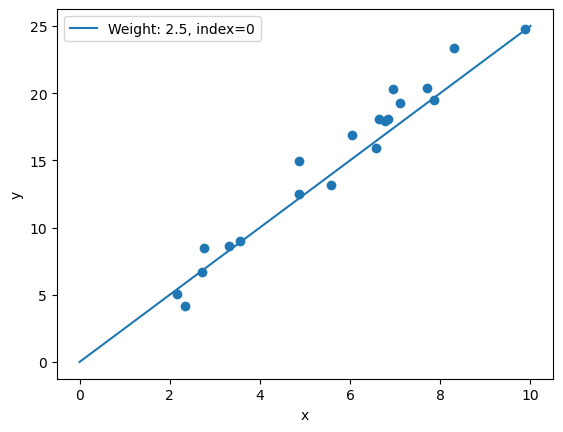

In [8]:
line_plotter(X, y, weights=[2.5])

The result should be similar to this:

<img src="https://edirlei.com/images/gd_output_1.png" width="400px">

## 2. Gradient Descent

Now we will describe and implement a naive gradient descent algorithm to find the weight. At the end, you will compare this weight with your guess from exercise 1.

Here are the steps of the naive gradient descent algorithm we will implement:

1. Randomly initialize the model parameters (in our case, a single parameter: weight);
2. Calculate the predictions;
3. Calculate the mean square error (loss) between the predictions and the labels;
4. Add an epsilon to the weight;
5. Calculate the loss_epsilon using weight+epsilon;
6. Calculate $\frac{loss\_epsilon-loss}{\epsilon}$;
7. Update the weight with $new\_weight = weight - learning\_rate*\frac{loss\_epsilon-loss}{\epsilon}$;
8. Calculate the new loss after the weight update;
9. Repeat steps 2-8 for a fixed number of epochs.

Let's build this algorithm step by step. Gradient descent needs a starting model. We will do this by randomly picking a weight. This will be our untrained model.

1. Randomly initialize model parameters (in our case, a single parameter: weight);

In [20]:
def initializer():
    return np.random.randn()

Let's now call the `initializer` function to initialize the weight:

In [27]:
weight = initializer()
weight

-0.8342041164994409

**Exercise 2:** Do you expect this weight to be a good one? Why or why not? Use `line_plotter` to plot the line corresponding to this weight. Repeat the `initializer()` a few times to see different starting models.

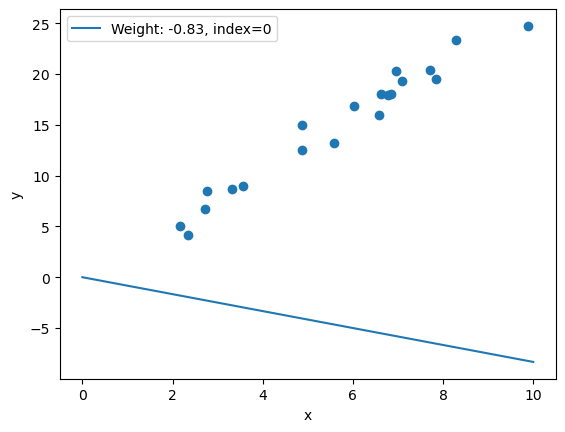

In [28]:
line_plotter(X, y, weights=[weight])

*I do not expect this weight to be a good one because the plotted line does not fit the data at all, and the direction of the slope is negative.*

Now we can get predictions from this model.

Let's continue following the naive gradient descent algorithm:

1. Randomly initialize model parameters (in our case, a single parameter: weight);
2. **Calculate the predictions**

In [29]:
def predict(X, weight, bias=0):
    return X * weight + bias

Let's now call the `predict` function to calculate the predictions for `X`:

In [30]:
y_pred = predict(X, weight)

Now let's compare the predictions (`y_pred`) with their expected values (`y`):

In [34]:
arr = np.concatenate((y_pred.reshape(-1, 1), y.reshape(-1, 1)), axis=1)
pd.DataFrame(arr, columns=['Random predictions (y_pred)', 'Labels (y)'])

,Random predictions (y_pred),Labels (y)
0,-4.650168,13.179888
1,-6.920973,23.351792
2,-2.306997,8.486452
3,-2.761924,8.647503
4,-1.798280,5.076266
5,-5.657467,17.923042
6,-2.265222,6.705158
7,-2.973323,8.975224
8,-5.485028,15.944149
9,-5.920234,19.286710


By comparing the predictions to the labels we can calculate the error. We will use the mean squared error (MSE). We can use another function to calculate the error, but for this exercise we will use the MSE.

This function is called the `loss function` which calculates the `loss`. It is sometimes referred to as the cost function.

Let's continue following the naive gradient descent algorithm:

1. Randomly initialize model parameters (in our case, a single parameter: weight);
2. Calculate the predictions;
3. **Calculate the mean square error (loss) between the predictions and the labels**;

In [36]:
from sklearn.metrics import mean_squared_error

loss = mean_squared_error(y, y_pred)

print('Weight:', weight)
print('Loss:', loss)

Weight: -0.8342041164994409
Loss: 442.1995624286934


Let's start plotting loss vs weight, which will help us see if our weight updates decrease loss.

Text(0, 0.5, 'Loss')

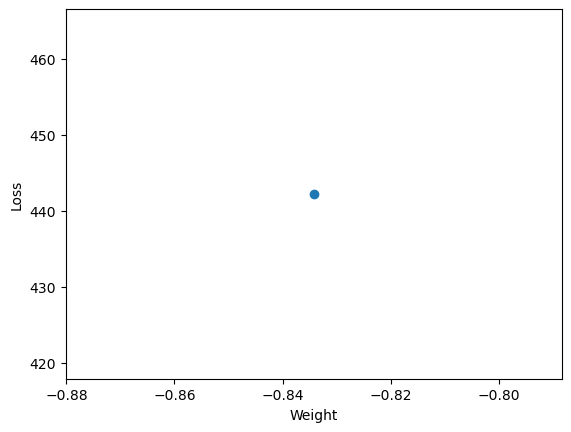

In [37]:
plt.scatter(weight, loss)
plt.xlabel('Weight')
plt.ylabel('Loss')

Now we would like to update the weight so that the loss decreases slightly. This is what gradient descent update rule does:

$new\_weight = weight - learning\_rate*\frac{dloss\_function}{dweight}$

such that the model defined by the `new_weight` is **better** than our first model defined by the random `weight` ('better' refers to a lower loss).

This is the case because if the derivative is positive, an increase in the weight increases the loss. Since we want to decrease the loss we go in the opposite direction of the derivative. We use learning rate to control the amount of the update.

We will estimate $\frac{dloss\_function}{dweight}$ with $\frac{\Delta loss\_function}{\Delta weight}$. How? When $\Delta weight$ is small:

$\frac{dloss\_function}{dweight} \approx \frac{\Delta loss\_function}{\Delta weight}$

In math, epsilon ($\epsilon$) is used to indicate small numbers. We will add an $\epsilon$ to the weight and calculate loss_epsilon (loss of the model with weight = weight + epsilon).

$\frac{\Delta loss\_function}{\Delta weight} = \frac{loss\_epsilon-loss}{weight+\epsilon - weight}= \frac{loss\_epsilon-loss}{\epsilon}$

Therefore, the gradient update rule becomes:

$new\_weight = weight - learning\_rate*\frac{loss\_epsilon-loss}{\epsilon}$

Let's add these steps to our algorithm:

1. Randomly initialize model parameters (in our case, a single parameter: weight);
2. Calculate the predictions;
3. Calculate the mean square error (loss) between the predictions and the labels;
4. **Add an epsilon to the weight**;
5. **Calculate the loss_epsilon using weight+epsilon**;
6. **Calculate $\frac{loss\_epsilon-loss}{\epsilon}$**;
7. **Update the weight with $new\_weight = weight - learning\_rate*\frac{loss\_epsilon-loss}{\epsilon}$**;
8. **Calculate the new loss after the weight update**.

**Exercise 3:** Complete steps 4 and 5 of the algorithm:

In [38]:
# Steps 4 and 5
epsilon = 0.001
y_pred_epsilon = predict(X, weight= weight + epsilon, bias = 0)
loss_epsilon = mean_squared_error(y, y_pred_epsilon)

**Exercise 4:** Complete step 6 using $derivative\_estimate = \frac{loss\_epsilon-loss}{\epsilon}$

In [39]:
# Step 6
derivative_estimate = (loss_epsilon - loss)/ epsilon
print(derivative_estimate)

-253.69309822201558


**Exercise 5:** Complete step 7: $new\_weight = weight - learning\_rate*\frac{loss\_epsilon-loss}{\epsilon}$

In [40]:
# Step 7
lr = 0.003 # learning rate
new_weight = weight - (lr * derivative_estimate)

In [41]:
# Step 8
new_y_pred = predict(X, new_weight)
new_loss = mean_squared_error(y, new_y_pred)

If you plot the weight and loss before and after the update, you should be able to see that the loss indeed decreases.

Text(0, 0.5, 'Loss')

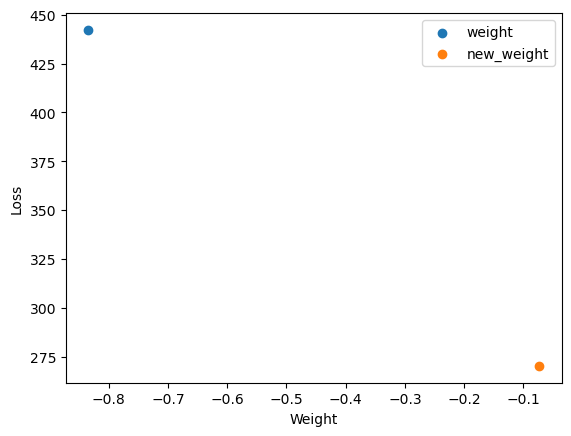

In [42]:
plt.scatter(weight, loss, label='weight')
plt.scatter(new_weight, new_loss, label = 'new_weight')
plt.legend()
plt.xlabel('Weight')
plt.ylabel('Loss')

Let's plot the models with random weight and updated weight to visually confirm that the updated weight gives us a better fitting model.

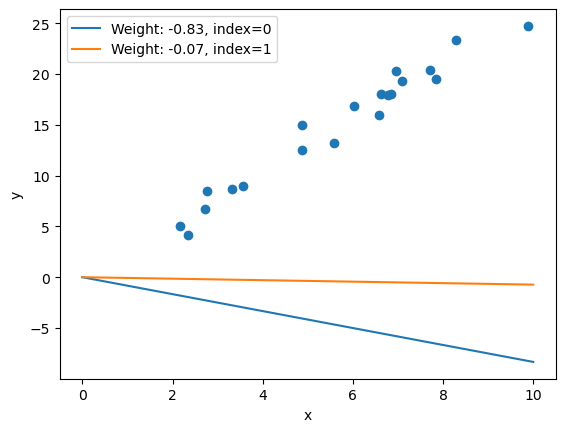

In [43]:
line_plotter(X, y, [weight, new_weight])

If you did everything correctly, you should see something similar to this:

<img src="https://edirlei.com/images/gd_output_2.png" width="400px">

We are almost done! Now it is time to repeat steps 2-8 a certain number of times (called epochs), so that we keep decreasing the loss. Let's check again the steps of the algorithm:

1. Randomly initialize model parameters (in our case a single parameter, weight)
2. Calculate the predictions
3. Calculate the mean square error (loss) between the predictions and the labels
4. Add an epsilon to the weight
5. Calculate the loss_epsilon using weight+epsilon
6. Calculate $\frac{loss\_epsilon-loss}{\epsilon}$
7. Update the weight with $new\_weight = weight - learning\_rate*\frac{loss\_epsilon-loss}{\epsilon}$
8. Calculate the new loss after the weight update.
9. **Repeat steps 2-8 for a fixed number of epochs.**

**Exercise 6:** Put together the steps to create the naive gradient descent algorithm we defined so far:

In [44]:
def naive_gradient_descent(X, y, epochs, epsilon, lr):
   
    weights = []
    losses = []

    weight = initializer()
    y_pred = predict(X, weight)
    loss = mean_squared_error(y, y_pred)

    weights.append(weight)
    losses.append(loss)

    for i in range(epochs):

        # Estimate the derivate
        y_pred_epsilon = predict(X, weight= weight + epsilon, bias = 0)
        loss_epsilon = mean_squared_error(y, y_pred_epsilon)
        derivative_estimate = (loss_epsilon - loss)/ epsilon

        # Gradient descent update rule
        weight = weight - (lr * derivative_estimate)
        y_pred = predict(X, weight)

        # New loss
        loss = mean_squared_error(y, y_pred)

        # Save new weight and loss
        weights.append(weight)
        losses.append(loss)
        
    return weights, losses

In [45]:
weights, losses = naive_gradient_descent(X, y, epochs=5, epsilon=0.001, lr=0.003)

Text(0, 0.5, 'Loss')

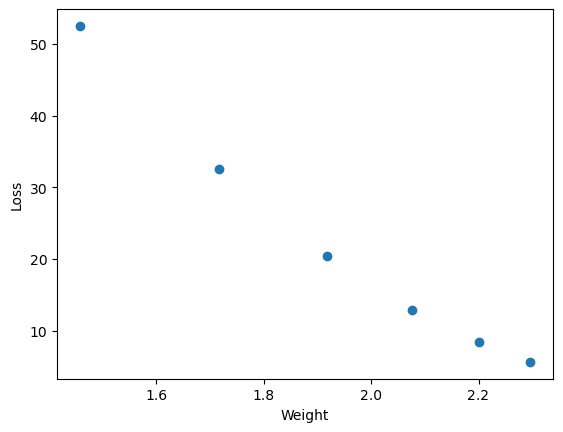

In [46]:
plt.scatter(weights, losses)
plt.xlabel('Weight')
plt.ylabel('Loss')

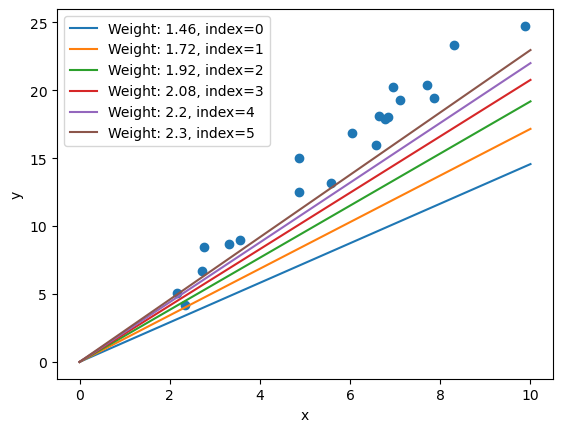

In [47]:
line_plotter(X, y, weights)

If you did everything correctly, you should see something similar to this:

<img src="https://edirlei.com/images/gd_output_3.png" width="410px">

<img src="https://edirlei.com/images/gd_output_4.png" width="400px">

**Exercise 7**: Compare your guess from exercise 1 to the weight learned from gradient descent. Do you think 5 epochs is enough, or increasing the number of epochs will improve the model?

*The result from exercise 1 is actually more accurate to the data than the weight learned from gradient descent. However, this is to be expected when only working with one parameter, as in this example, because it is easier for us to see the best fit in a 2d space.
Let's try it with more epochs, as I believe if the function is applied more than 5 times, it will succeed due to the plotted lines slowly being a better fit to the data*

**Exercise 8:** Change the number of epochs to observe the effect of the hyperparameter.

Text(0, 0.5, 'Loss')

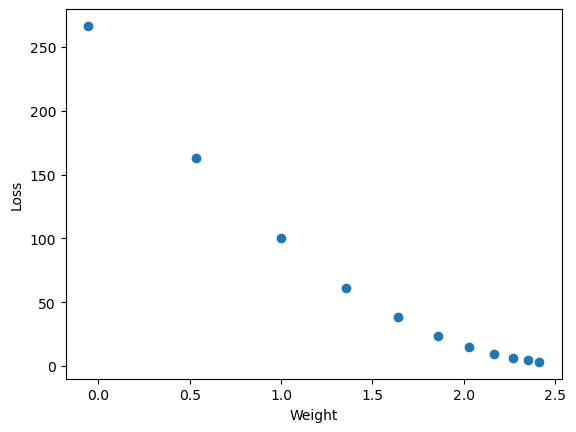

In [49]:
# Fitting for 10 epochs
weights, losses = naive_gradient_descent(X, y, epochs=10, epsilon=0.001, lr=0.003)

# Plot the data points
plt.scatter(weights, losses)
plt.xlabel('Weight')
plt.ylabel('Loss')

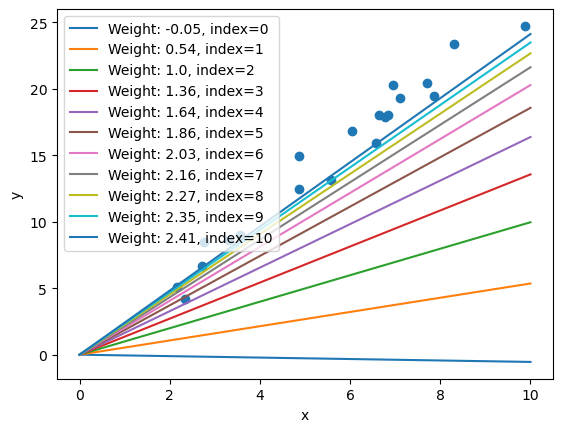

In [50]:
# Plot the gradient descend function
line_plotter(X, y, weights)

*From the graph, it is obvious that as more epochs are used, the closer the weight gets to our initial prediction of 2.5* 

Text(0, 0.5, 'Loss')

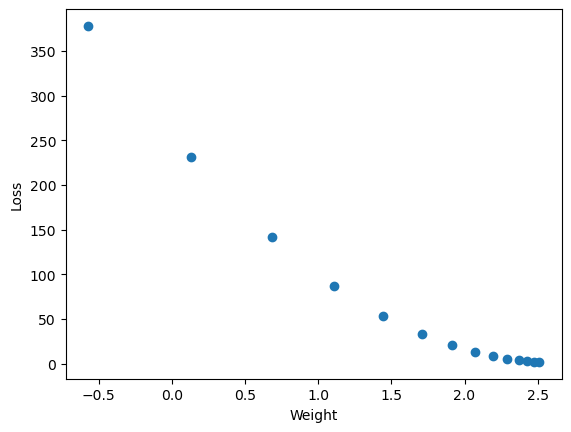

In [51]:
# Fitting for 10 epochs
weights, losses = naive_gradient_descent(X, y, epochs=13, epsilon=0.001, lr=0.003)

# Plot the data points
plt.scatter(weights, losses)
plt.xlabel('Weight')
plt.ylabel('Loss')

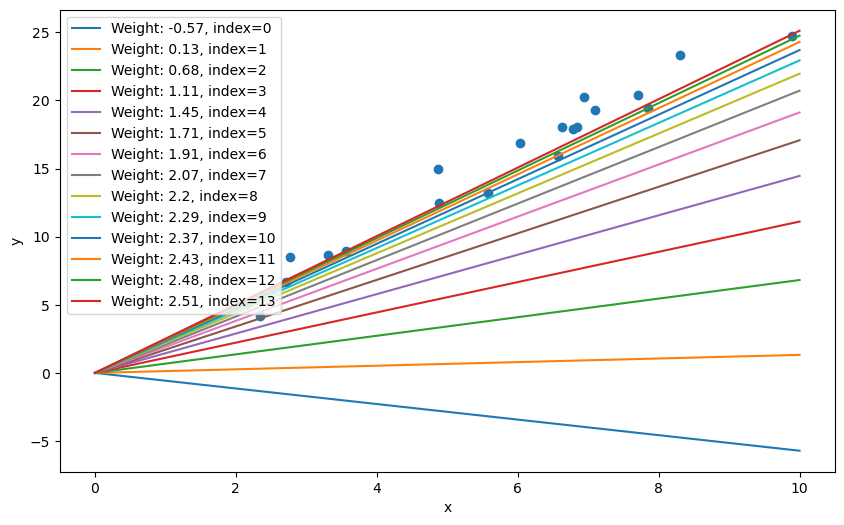

In [62]:
# Plot the gradient descend function
plt.figure(figsize=(10,6))
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X, y)
for i, weight in enumerate(weights):
    line_text= f'Weight: {np.round(weight, 2)}, index={i}'
    plt.plot([0, 10], [0, 10*weight], label=line_text)
plt.legend()

*I plotted the points manually instead of using the function because the legend was too big to fit. As observed, at 13 epochs, with a weight of 2.51, the line fits the data appropriately.*

**Exercise 9:** Change the learning rate to observe the effect of the hyperparameter to learning. For example, what happens when the learning rate it very small (0.0001) or very large (10).

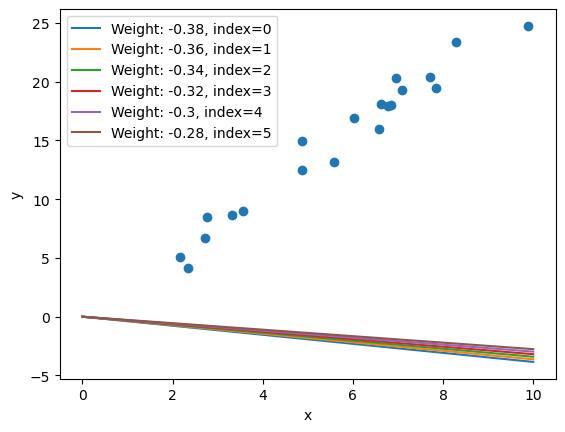

In [63]:
weights, losses = naive_gradient_descent(X, y, epochs=5, epsilon=0.001, lr=0.0001)
line_plotter(X, y, weights)

*When the lr is very small, the gradient descent algorithm moves very slowly, and a very high number of epochs would be needed to achieve a good fit*

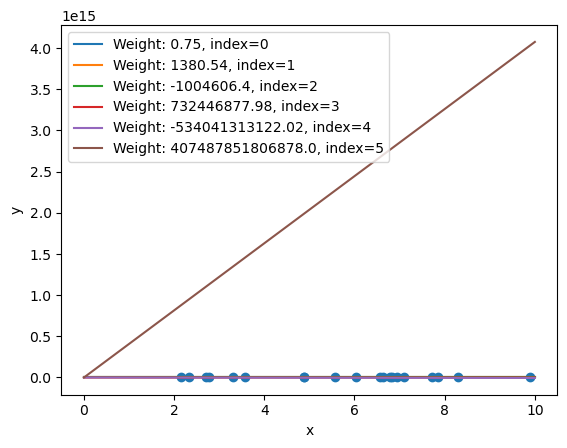

In [64]:
weights, losses = naive_gradient_descent(X, y, epochs=5, epsilon=0.001, lr=10)
line_plotter(X, y, weights)

*On the contrary, qith a high lr, the algorithm takes large steps during optimization, and overshoots the minimum.*

**Exercise 10:** The exact weight used to generate this dataset was 2.723. Compare this to your initial guess and the result of the gradient descent. Change learning rate and epochs to get as close as possible to this number with our naive gradient descent algorithm.

Final weight: 2.7240946717151084


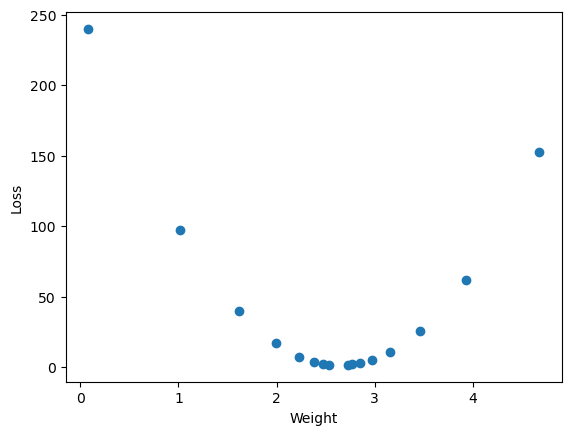

In [89]:
weights, losses = naive_gradient_descent(X, y, epochs=15, epsilon=0.001, lr=0.0246)
plt.scatter(weights, losses)
plt.xlabel('Weight')
plt.ylabel('Loss')
print('Final weight:', weights[-1])

[Explain here why you can't get to weight = 2.723]

*It is very difficult to get to a certain weight because of the sensitivity of the hyperparameteres*

**Exercise 11:** The code used to generate the dataset is provided below. Increase the number of data points to 100 (or more) to see if you can approach the `weight = 2.723`.

Text(0.5, 0, 'x')

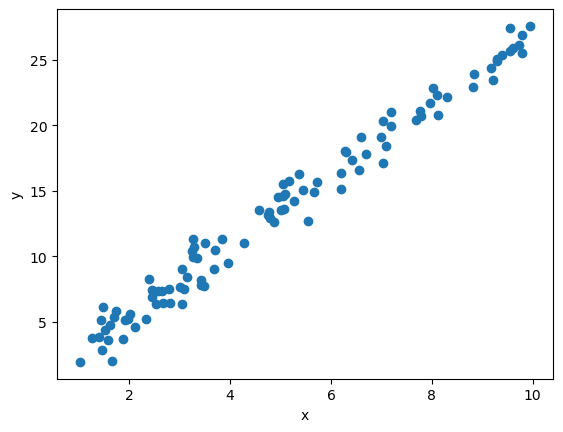

In [90]:
# number of training data
n = 100

bias = 0 # y intercept
weight = 2.723 # slope

X = np.random.uniform(1, 10, n) 
y = weight * X + bias + np.random.randn(n) # random noise added

plt.scatter(X, y)
plt.ylabel('y')
plt.xlabel('x')

Now change the learning rate and epochs to see if you can approach the `weight = 2.723`:

Final weight: 2.723788030735145


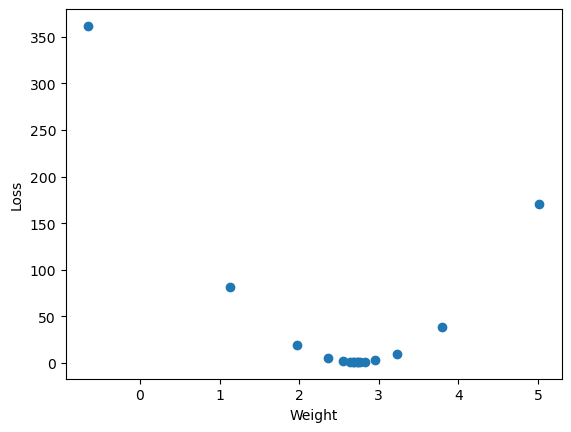

In [108]:
weights, losses = naive_gradient_descent(X, y, epochs=15, epsilon=0.001, lr=0.0264)
plt.scatter(weights, losses)
plt.xlabel('Weight')
plt.ylabel('Loss')
print('Final weight:', weights[-1])

*With more data points, the model has a richer set of information to learn from, which lead to better convergence to the desired weight. Additionally, the noise introduced in the data helped as well by exposing the model to a more diverse range of examples, which resulted in the model learning more robust and flexible representations of the data distribution*